In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
# Seed para reprodução de resultados
seed = 1
random.seed(seed)
np.random.seed(seed)
import warnings
#Ignorar todos os warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('horse.csv')
data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [ ]:
data.info() # verifiquei que existem diversas colunas com dados faltantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [ ]:
data.shape #299 linhas e 28 colunas

(299, 28)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
hospital_number,299.0,1.087733e+06,1.532032e+06,518476.0,528904.0,530301.0,534736.00,5305629.0
rectal_temp,239.0,3.816862e+01,7.337444e-01,35.4,37.8,38.2,38.50,40.8
pulse,275.0,7.200000e+01,2.864622e+01,30.0,48.0,64.0,88.00,184.0
respiratory_rate,241.0,3.046058e+01,1.766610e+01,8.0,18.0,25.0,36.00,96.0
nasogastric_reflux_ph,53.0,4.707547e+00,1.982311e+00,1.0,3.0,5.0,6.50,7.5
packed_cell_volume,270.0,4.630741e+01,1.043674e+01,23.0,38.0,45.0,52.00,75.0
total_protein,266.0,2.427444e+01,2.736419e+01,3.3,6.5,7.5,56.75,89.0
abdomo_protein,101.0,3.039604e+00,1.967947e+00,0.1,2.0,2.3,3.90,10.1
lesion_1,299.0,3.659709e+03,5.408472e+03,0.0,2111.5,2322.0,3209.00,41110.0
lesion_2,299.0,9.052843e+01,6.506371e+02,0.0,0.0,0.0,0.00,7111.0


# Pré - Processamento

In [ ]:
X_train = data.loc[:,data.columns != 'outcome'] # Já separei minha coluna target do X_train
X_train.shape

(299, 27)

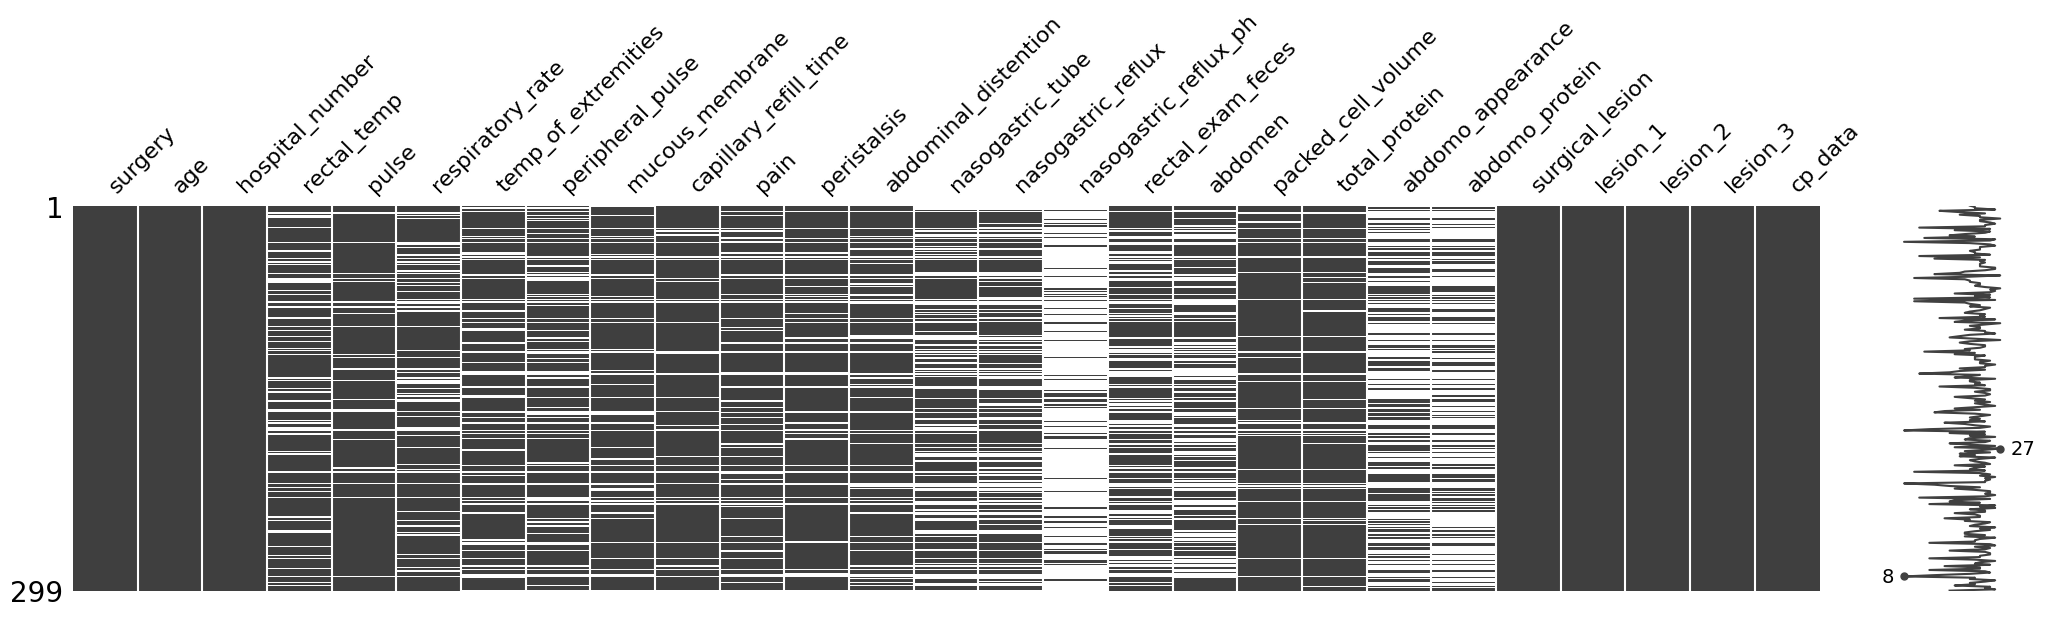

In [ ]:
# Visualizar missing
import missingno as msno
msno.matrix(X_train, figsize=(25,5)); # importei o missigno para verificar graficamente os dados faltantes das colunas

In [ ]:
# Calcular o percentual de valores faltantes por coluna
percent_missing_columns = X_train.isnull().mean().sort_values(ascending=False) * 100
percent_missing_columns = percent_missing_columns.reset_index()
percent_missing_columns.columns = ['features', 'percent_missing']
percent_missing_columns

,features,percent_missing
0,nasogastric_reflux_ph,82.274247
1,abdomo_protein,66.220736
2,abdomo_appearance,55.183946
3,abdomen,39.464883
4,nasogastric_reflux,35.451505
5,nasogastric_tube,34.782609
6,rectal_exam_feces,34.113712
7,peripheral_pulse,23.076923
8,rectal_temp,20.066890
9,respiratory_rate,19.397993


In [ ]:
# Deletar os atributos com mais de 15,71% de missings
att_to_delete = percent_missing_columns['features'][0:13].to_numpy()
att_to_delete



array(['nasogastric_reflux_ph', 'abdomo_protein', 'abdomo_appearance',
       'abdomen', 'nasogastric_reflux', 'nasogastric_tube',
       'rectal_exam_feces', 'peripheral_pulse', 'rectal_temp',
       'respiratory_rate', 'temp_of_extremities', 'abdominal_distention',
       'pain'], dtype=object)

In [ ]:
# Verificar missing por linha
percent_missing_rows = X_train.apply(lambda x: x.isnull().sum() * 100 / len(X_train),
                                     axis=1).sort_values(ascending=False)
df = pd.DataFrame({'row_index': X_train.index, 'percent_missing': percent_missing_rows})
df.head(30)

,row_index,percent_missing
28,0,6.354515
215,1,6.354515
174,2,6.354515
287,3,6.354515
206,4,5.685619
56,5,5.685619
72,6,5.685619
74,7,5.685619
130,8,5.351171
39,9,5.351171


In [ ]:
# deletar atributos que identificamos acima
X_train.drop(att_to_delete, axis=1, inplace=True)
X_train.shape

(299, 14)

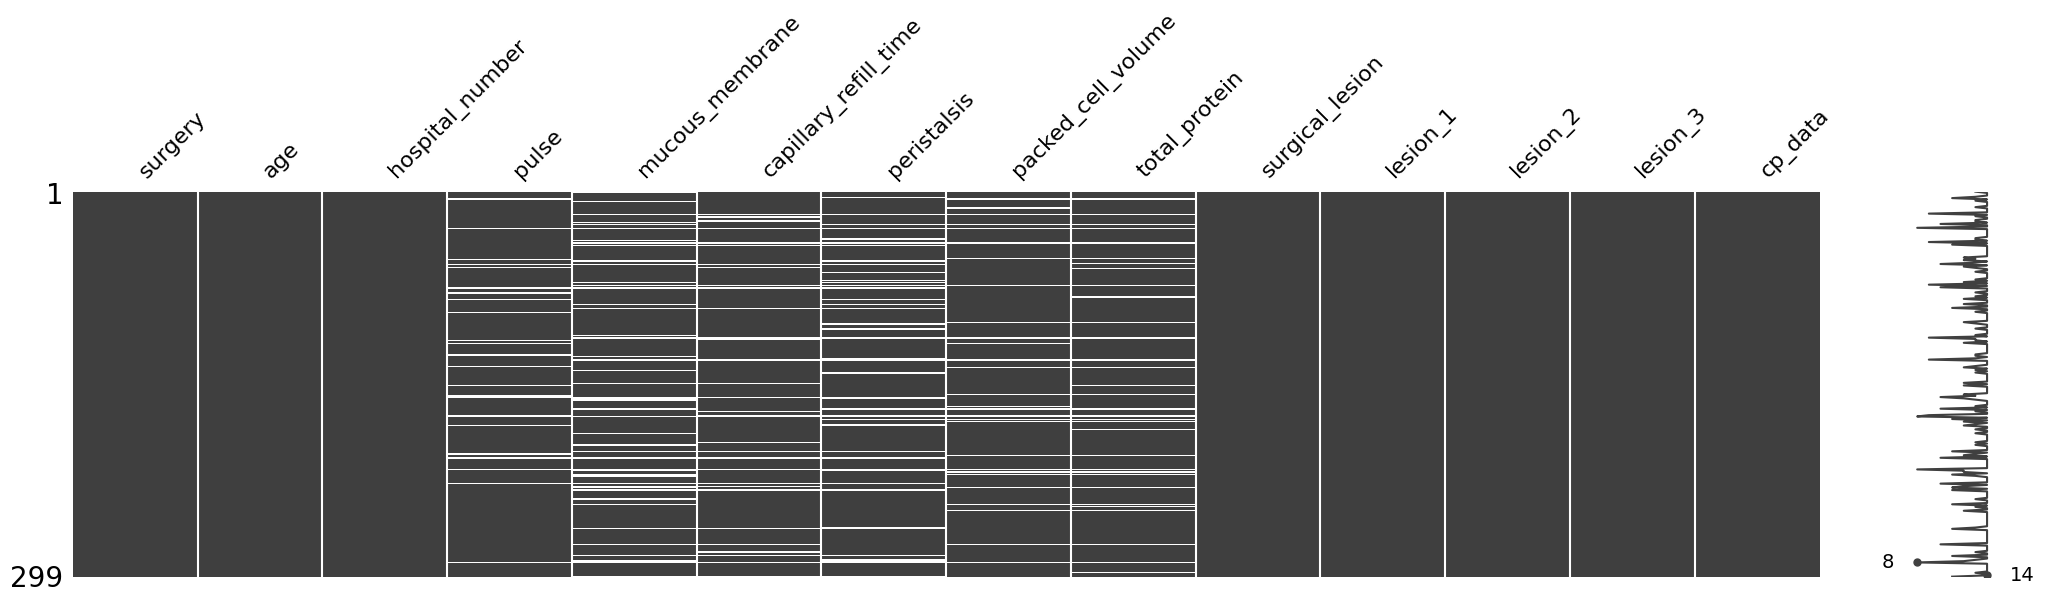

In [ ]:
msno.matrix(X_train, figsize=(25,5)); # Resultado após a deleção dos atributos

In [ ]:
y_train = data.loc[:,data.columns == 'outcome'] #Criei o y_train com o meu target
y_train.shape

(299, 1)

In [ ]:
# Classe tem missing?
y_train.isnull().sum() # nenhum missing

outcome    0
dtype: int64

In [ ]:
#verificar proporção de cada classe, está um pouco desbalanceado mas optei por não tentar corrigir
y_train.value_counts()

outcome   
lived         178
died           77
euthanized     44
Name: count, dtype: int64

In [ ]:
#Importando os preprocesadores
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [ ]:
# Transformar a coluna target em numérica
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

In [ ]:
y_train

array([0, 1, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 1, 1, 2, 2, 0, 0, 2, 2, 1,
       1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 0, 0, 0, 1, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 1,
       2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 0,
       0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 1, 2, 2, 2, 1, 2, 0, 0,
       2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 0, 2, 0, 0, 2, 2,
       0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2,
       2, 2, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 1, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 2, 1, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 2, 2, 0, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1,
       2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 2, 1])

In [ ]:
X_train.head() # meus atributos escolhidos, os valores faltantes serão tratados via pipeline

,surgery,age,hospital_number,pulse,mucous_membrane,capillary_refill_time,peristalsis,packed_cell_volume,total_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,66.0,NaN,more_3_sec,absent,45.0,8.4,no,11300,0,0,no
1,yes,adult,534817,88.0,pale_cyanotic,less_3_sec,absent,50.0,85.0,no,2208,0,0,no
2,no,adult,530334,40.0,pale_pink,less_3_sec,hypomotile,33.0,6.7,no,0,0,0,yes
3,yes,young,5290409,164.0,dark_cyanotic,more_3_sec,absent,48.0,7.2,yes,2208,0,0,yes
4,no,adult,530255,104.0,dark_cyanotic,more_3_sec,NaN,74.0,7.4,no,4300,0,0,no


In [ ]:
# Importação dos modelos a serem comparados,pipeline, normalização e validação cruzada
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from optuna import create_study, Trial,logging
from optuna.samplers import TPESampler
import time

## Criando o pipeline que será usado para processar os dados

In [ ]:
categorical_features_with_order = ['age'] # atributos que tem ordem
categorical_features_without_order = ['surgery','surgical_lesion','cp_data','mucous_membrane', 'peristalsis', 'total_protein', 'capillary_refill_time', 'packed_cell_volume', 'pulse'] # atributos que não tem ordem
numerical_features = X_train.select_dtypes(exclude=['object']).columns.tolist() # atributos numéricos

# Definindo o imputador para valores ausentes nas colunas categóricas e numéricas
imputer = SimpleImputer(strategy='most_frequent') # optei aqui por tratar os valores faltantes das colunas catgóricas usando o valor mais frequente.
imputer_numeric = SimpleImputer(strategy='mean') # Coloquei a média para os valores numéricos

# Transformador para colunas categóricas com ordem
categorical_transformer_with_order = Pipeline(steps=[
    ('imputer', imputer),
    ('ordinal', OrdinalEncoder())
])

# Transformador para colunas categóricas sem ordem
categorical_transformer_without_order = Pipeline(steps=[
    ('imputer', imputer),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
])

# Transformador para colunas numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', imputer_numeric),
    ('scaler', StandardScaler())
])

# Combinando transformadores com ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('cat_ord', categorical_transformer_with_order, categorical_features_with_order),
    ('cat_nom', categorical_transformer_without_order, categorical_features_without_order),
    ('num', numeric_transformer, numerical_features)
])

# Criando o pipeline completo para mostrar visualmente
pipeline_visual = Pipeline(steps=[
    ('preprocessor', preprocessor),
])

# Mostrando visualmente como irão ocorrer os steps do pipeline com os dados.
pipeline_visual.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['age']),
                                                 ('cat_nom',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['surgery', 'surgical_lesion',
                                                   'cp_data', 'mucous_membrane',
                                                   'peristalsis',
                                                   'total_protein',
                                                   'capillary_refill_time',
                                                   'packed_cell_volume',
                                                   'pulse']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['hospital_number', 'pulse',
                                                   'packed_cell_volume',
                                                   'total_protein', 'lesion_1',
                                                   'lesion_2',
                                                   'lesion_3'])]))])

In [ ]:
# Dicionário para armazenar os melhores parâmetros e valores
best_params_per_model = {}
best_values_per_model = {}
training_times_per_model = {}

In [ ]:
# Definindo a estratégia de validação cruzada com random_state e 10 splits
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

# Aqui usei optuna para a busca dos melhores hiperparametros, como meu problema é uma classificação multivalorada optei por usar o 'f1_weighted', o retorno da função é a média do scoring achado

# 5 modelos serão testados, Decision Tree, Random Forest, SVM, XGBOOST e KNN

In [ ]:
#Decision Tree
def objective_dt(trial):

    max_depth = trial.suggest_int('max_depth', 2, 32, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    model = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=seed
    )
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Avaliação usando validação cruzada
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1_weighted',n_jobs=-1)
    return cv_results.mean()

In [ ]:
# Random Forest
def objective_rf(trial):

    n_estimators = trial.suggest_int('n_estimators', 500, 5000)
    max_depth = trial.suggest_int('max_depth', 2, 32, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=seed
    )
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Avaliação usando validação cruzada
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1_weighted',n_jobs=-1)
    return cv_results.mean()

In [ ]:
# KNN
def objective_knn(trial):

    n_neighbors = trial.suggest_int("n_neighbors", 1, 30)
    weights = trial.suggest_categorical("weights", ['uniform', 'distance'])
    metric = trial.suggest_categorical("metric", ['euclidean', 'manhattan', 'minkowski'])
    model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    # Avaliação usando validação cruzada
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1_weighted',n_jobs=-1)
    return cv_results.mean()

In [ ]:
# Suport Vector Machine
def objective_svm(trial):

    C = trial.suggest_float('C', 1e-6, 1e+6, log=True)
    gamma = trial.suggest_float('gamma', 1e-6, 1e+1, log=True)
    model = SVC(
            C=C, gamma=gamma,random_state=seed
        )


    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    # Avaliação usando validação cruzada
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1_weighted',n_jobs=-1)
    return cv_results.mean()

In [ ]:
#XGBOOST
def objective_xgb(trial):

    params = {
        'n_estimators' : trial.suggest_int('n_estimators', 500, 5000),
        'max_depth': trial.suggest_int('max_depth', 2, 32, log=True),
        'learning_rate': trial.suggest_float('learning_rate',0.01, 0.5),
        'gamma': trial.suggest_float('gamma',0, 1),
        'reg_lambda' : trial.suggest_float('reg_lambda', 0, 1, step = 0.1),
        'subsample': trial.suggest_float('subsample',0.5,1, step = 0.1),
        'colsample_bytree': trial.suggest_float('colsample_bytree',0.5,1, step = 0.1),
        'min_child_weight' : 5,
    }


    model = XGBClassifier(**params, random_state=seed, n_jobs = -1)

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    cv_results = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1_weighted',n_jobs=-1)

    return cv_results.mean()

In [ ]:
class EarlyStoppingCallback:
    def __init__(self, patience: int, min_trials: int = 10):
        """
        Inicializa o callback de early stopping.

        Parâmetros:
        - patience: Número de iterações sem melhora após o qual o estudo será interrompido.
        - min_trials: Número mínimo de trials a serem executados antes de considerar o early stopping.
        """
        self.patience = patience
        self.min_trials = min_trials
        self._best_value = None
        self._best_step = 0

    def __call__(self, study, trial):
        # Atualiza o melhor valor e o passo correspondente
        if self._best_value is None or study.best_value > self._best_value:
            self._best_value = study.best_value
            self._best_step = trial.number

        # Verifica se o número de iterações sem melhora excede a paciência
        if trial.number >= self.min_trials and trial.number - self._best_step >= self.patience:
            print(f"Early stopping triggered: Best score not improved after {self.patience} trials.")
            study.stop()


In [ ]:

early_stopping = EarlyStoppingCallback(patience=100, min_trials=100)


## Optuna para achar os melhores hiperparâmetros

In [ ]:
# Lista de modelos a serem testados
models = ['Decision Tree','XGBOOST', 'RandomForest', 'SVM','KNN']
# Configurar e otimizar para cada modelo separadamente
objectives = {
    'Decision Tree' : objective_dt,
    'XGBOOST': objective_xgb,
    'RandomForest': objective_rf,
    'SVM': objective_svm,
    'KNN' : objective_knn,


}
logging.set_verbosity(logging.WARNING)
for model_name in models:
    print(f'Otimização para {model_name}\n')

    start_time = time.time()  # Início do tempo de treinamento
    sampler = TPESampler(seed=seed) # parametros para reprodução de resultados
    study = create_study(direction='maximize',sampler=sampler) # crio um estudo para maximizar o f1_weighted
    study.optimize(objectives[model_name], n_trials=500,show_progress_bar=True,n_jobs= 1,callbacks=[early_stopping]) # 500 trials para cada modelo
    end_time = time.time()  # Fim do tempo de treinamento

    training_time = end_time - start_time
    training_times_per_model[model_name] = training_time

    best_params_per_model[model_name] = study.best_params
    best_values_per_model[model_name] = study.best_value


Otimização para Decision Tree



  0%|          | 0/500 [00:00<?, ?it/s]

Early stopping triggered: Best score not improved after 100 trials.
Otimização para XGBOOST



  0%|          | 0/500 [00:00<?, ?it/s]

Early stopping triggered: Best score not improved after 100 trials.
Otimização para RandomForest



  0%|          | 0/500 [00:00<?, ?it/s]

Early stopping triggered: Best score not improved after 100 trials.
Otimização para SVM



  0%|          | 0/500 [00:00<?, ?it/s]

Early stopping triggered: Best score not improved after 100 trials.
Otimização para KNN



  0%|          | 0/500 [00:00<?, ?it/s]

Early stopping triggered: Best score not improved after 100 trials.


In [ ]:
# Printo na tela os melhores parâmetros,valores e tempo de treinamento
print('Melhores parâmetros encontrados para cada modelo:')
for model_name in models:
    print(f'{model_name}:')
    print(f'  Melhores parâmetros: {best_params_per_model[model_name]}')
    print(f'  Melhor valor: {best_values_per_model[model_name]:.4f}')
    print(f'  Tempo de treinamento: {training_times_per_model[model_name]:.2f} segundos')

Melhores parâmetros encontrados para cada modelo:
Decision Tree:
  Melhores parâmetros: {'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 6}
  Melhor valor: 0.6585
  Tempo de treinamento: 5.92 segundos
XGBOOST:
  Melhores parâmetros: {'n_estimators': 2192, 'max_depth': 14, 'learning_rate': 0.3355863026927765, 'gamma': 0.8762026074335023, 'reg_lambda': 0.7000000000000001, 'subsample': 0.9, 'colsample_bytree': 0.9}
  Melhor valor: 0.7216
  Tempo de treinamento: 382.83 segundos
RandomForest:
  Melhores parâmetros: {'n_estimators': 3153, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 1}
  Melhor valor: 0.6895
  Tempo de treinamento: 1230.30 segundos
SVM:
  Melhores parâmetros: {'C': 1.5729333521737643, 'gamma': 0.057956245733705565}
  Melhor valor: 0.7097
  Tempo de treinamento: 18.91 segundos
KNN:
  Melhores parâmetros: {'n_neighbors': 4, 'weights': 'distance', 'metric': 'manhattan'}
  Melhor valor: 0.6881
  Tempo de treinamento: 16.31 segundos


### De todos os modelos otimizados via optuna, o que tem melhor valor é o XGBOOST

# Carregar base de teste

In [ ]:
#base de de teste
test = pd.read_csv('horseTest.csv')
test.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,1,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
1,no,adult,2,39.1,72.0,52.0,warm,NaN,bright_pink,less_3_sec,...,50.0,7.8,NaN,NaN,lived,yes,2111,0,0,no
2,yes,adult,3,37.2,42.0,12.0,warm,normal,normal_pink,less_3_sec,...,NaN,7.0,NaN,NaN,lived,no,4124,0,0,no
3,no,young,4,38.0,92.0,28.0,normal,normal,bright_pink,less_3_sec,...,37.0,6.1,clear,NaN,died,no,0,0,0,yes
4,yes,adult,5,37.6,64.0,21.0,normal,normal,bright_pink,less_3_sec,...,40.0,7.0,clear,NaN,lived,yes,4205,0,0,yes


## Pré Processar base de teste

In [ ]:
X_test = test.loc[:,test.columns != 'outcome']
X_test.shape

(89, 27)

In [ ]:
X_test.drop(att_to_delete, axis=1, inplace=True) #Dropar colunas com muitos missings
X_test.shape

(89, 14)

In [ ]:
y_test = test.loc[:,test.columns == 'outcome']
y_test.shape

(89, 1)

In [ ]:
y_test.value_counts()

outcome   
lived         53
died          23
euthanized    13
Name: count, dtype: int64

In [ ]:
# Classe tem missing?
y_test.isnull().sum() # nenhum missing

outcome    0
dtype: int64

In [ ]:
# Transformar a coluna target em numérica
y_test = label_encoder.fit_transform(y_test)

# Fit da base de treino com os melhores hiperparâmetros e teste

In [ ]:
# Função para treinar e avaliar modelos com melhores parâmetros
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

def train_and_evaluate_best_model(model_name, best_params, X_train, y_train, X_test, y_test):
    if model_name == 'RandomForest':
        model = RandomForestClassifier(**best_params, random_state=seed)
    elif model_name == 'SVM':
        model = SVC(**best_params, random_state=seed)
    elif model_name == 'XGBOOST':
        model = XGBClassifier(**best_params, random_state=seed, use_label_encoder=False)
    elif model_name == 'Decision Tree':
        model = DecisionTreeClassifier(**best_params, random_state=seed)
    elif model_name == 'KNN':
        model = KNeighborsClassifier(**best_params)

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train) # aqui a questão de valores faltantes, média de valores numéricos do treino são atribuidos ao dataset de teste via pipeline
    # Predição no conjunto de treino
    y_train_pred = pipeline.predict(X_train)

    # Predição no conjunto de teste
    y_test_pred = pipeline.predict(X_test) # aqui a questão de valores faltantes, média de valores numéricos do treino são atribuidos ao dataset de teste via pipeline

    # Métricas para o conjunto de treino
    print(f'{model_name} - Métricas de Treino:')
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_kappa = cohen_kappa_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    print(f'Acurácia: {train_accuracy:.4f}')
    print(f'Kappa: {train_kappa:.4f}')
    print(f'F1: {train_f1:.4f}')

    # Matriz de confusão para o conjunto de treino
    cm_train = confusion_matrix(y_train, y_train_pred)
    cm_train_display = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=label_encoder.inverse_transform(np.unique(y_train.tolist())))
    cm_train_display.plot()
    plt.title(f'{model_name} - Matriz de Confusão Treino')
    plt.show()

    # Métricas para o conjunto de teste
    print(f'{model_name} - Métricas de Teste:')
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_kappa = cohen_kappa_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    print(f'Acurácia: {test_accuracy:.4f}')
    print(f'Kappa: {test_kappa:.4f}')
    print(f'F1: {test_f1:.4f}')

    # Matriz de confusão para o conjunto de teste
    cm_test = confusion_matrix(y_test, y_test_pred)
    cm_test_display = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=label_encoder.inverse_transform(np.unique(y_test.tolist())))
    cm_test_display.plot()
    plt.title(f'{model_name} - Matriz de Confusão Teste')
    plt.show()

In [ ]:
# Verificar se os atributos do conjunto de treino e teste são iguais
if list(X_train.columns) != list(X_test.columns):
        print("Erro: As features do conjunto de treino e teste não são iguais.")


Treinamento e avaliação do modelo Decision Tree
Decision Tree - Métricas de Treino:
Acurácia: 0.7793
Kappa: 0.5852
F1: 0.7721


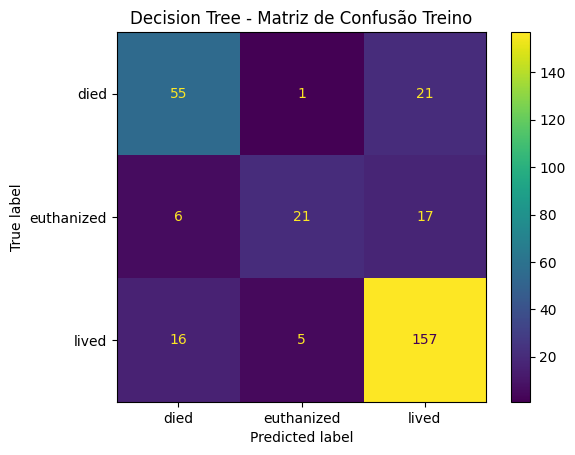

Decision Tree - Métricas de Teste:
Acurácia: 0.7640
Kappa: 0.5522
F1: 0.7566


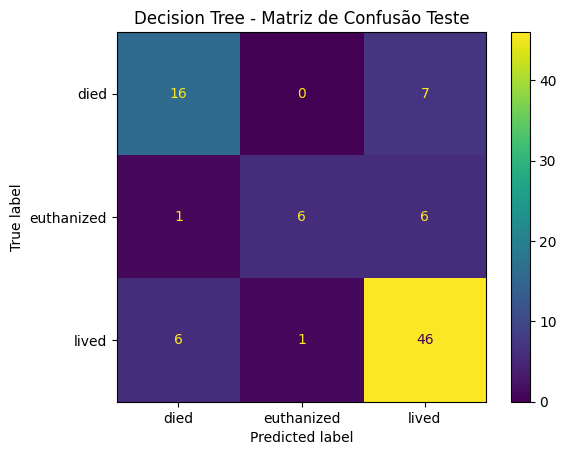

Treinamento e avaliação do modelo XGBOOST
XGBOOST - Métricas de Treino:
Acurácia: 0.9766
Kappa: 0.9575
F1: 0.9765


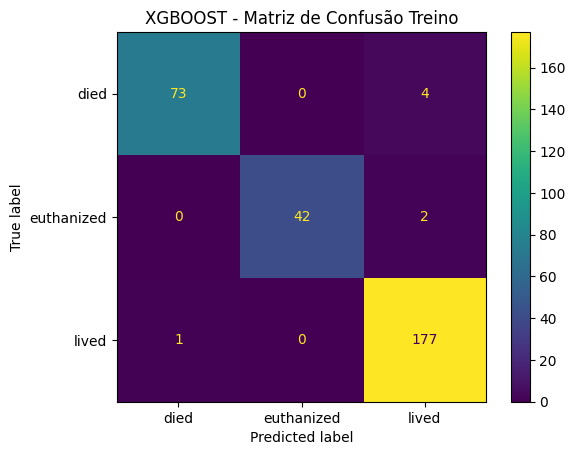

XGBOOST - Métricas de Teste:
Acurácia: 0.9101
Kappa: 0.8326
F1: 0.9077


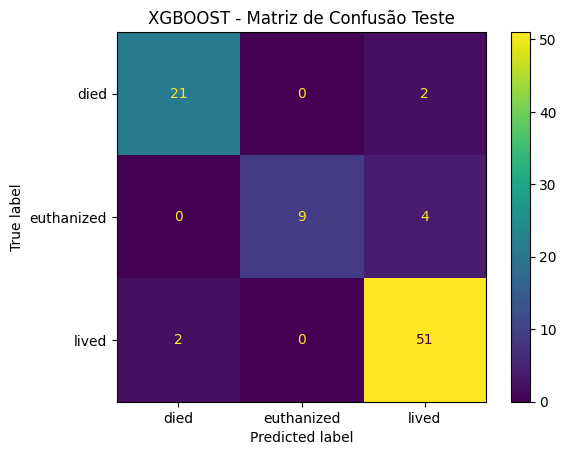

Treinamento e avaliação do modelo RandomForest
RandomForest - Métricas de Treino:
Acurácia: 0.9599
Kappa: 0.9260
F1: 0.9591


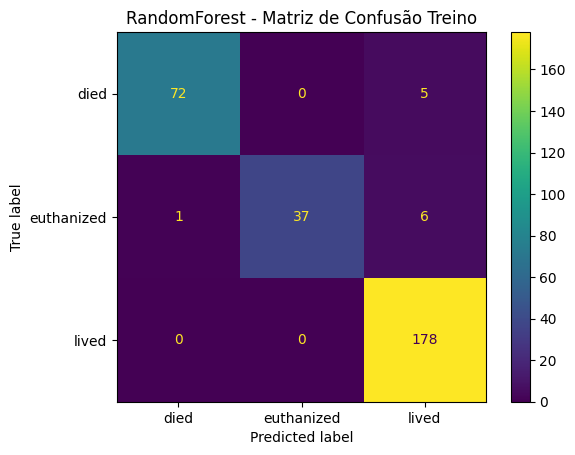

RandomForest - Métricas de Teste:
Acurácia: 0.9213
Kappa: 0.8511
F1: 0.9161


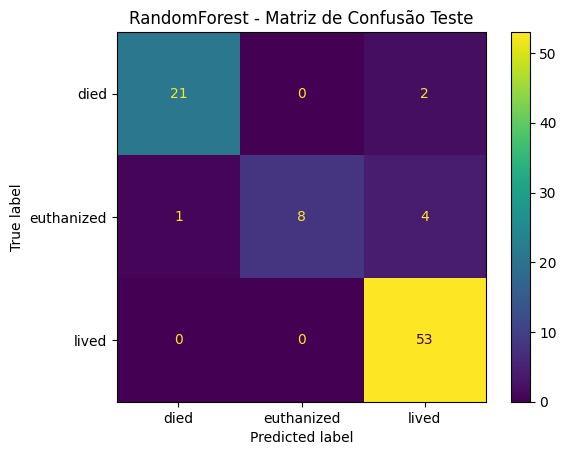

Treinamento e avaliação do modelo SVM
SVM - Métricas de Treino:
Acurácia: 0.8528
Kappa: 0.7158
F1: 0.8423


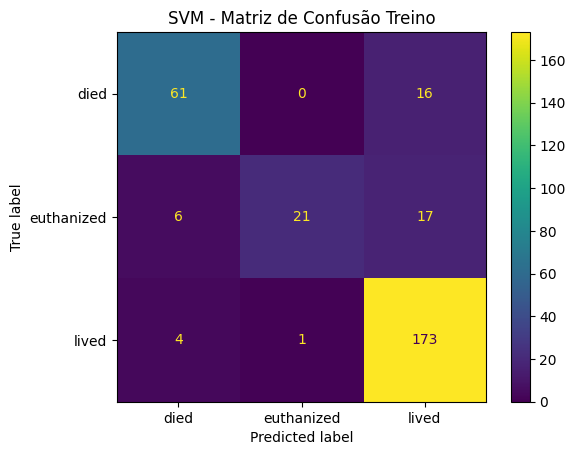

SVM - Métricas de Teste:
Acurácia: 0.8539
Kappa: 0.7118
F1: 0.8410


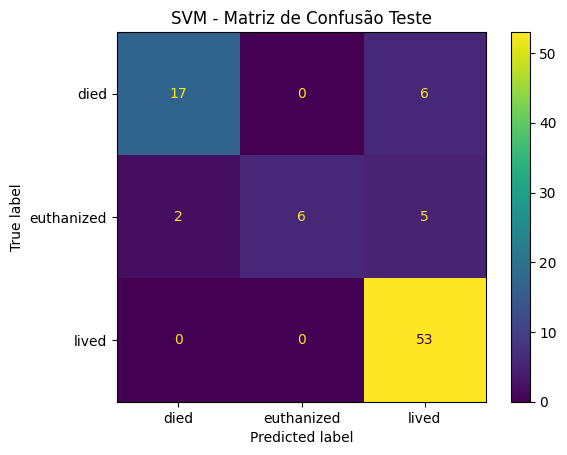

Treinamento e avaliação do modelo KNN
KNN - Métricas de Treino:
Acurácia: 1.0000
Kappa: 1.0000
F1: 1.0000


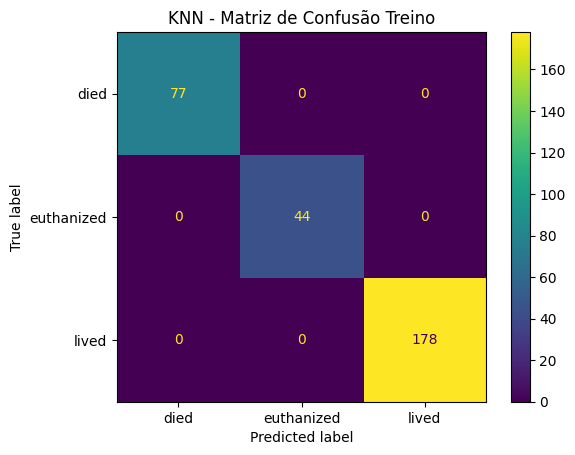

KNN - Métricas de Teste:
Acurácia: 0.9775
Kappa: 0.9591
F1: 0.9772


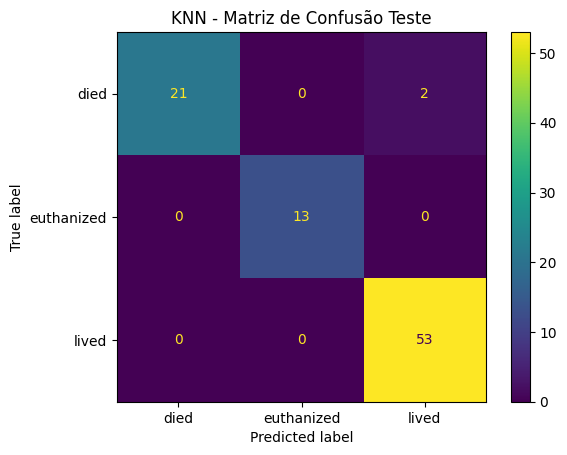

In [ ]:
# Treinamento e avaliação dos modelos com os melhores parâmetros
for model_name in models:
    print(f'Treinamento e avaliação do modelo {model_name}')
    train_and_evaluate_best_model(model_name, best_params_per_model[model_name], X_train, y_train, X_test, y_test)

### Considerações finais:
### O modelo 'decision tree' não performou bem no treino e teste, excluiria ele das opções válidas
### Minha decisão ficou entre o XGBOOST , Random Forest, KNN e SVM
### Apesar do bom rendimento do modelo Random Forest, sua procura pelos melhores parâmetros usando optuna é muito lento se comparado aos outros dois modelos restantes
### Ao meu ver, tanto KNN quanto XGBOOST poderiam ser usado para um modelo de produção
### Apesar do XGBOOST conseguir um resultado melhor que todos no optuna, no teste o KNN se sai muito melhor, errando apenas 2 registros enquanto o XGBOOST errou 8 e o Random Forest 7
### Para finalizar, o modelo de k-nearest neighbors foi o que se aproximou melhor nos testes, tendo um F1 Score de 97.72% contra 91.61% do Random Forest e 90.77% do XGBOOST
### Meu Rank:
### 1 KNN (Foi muito bem pois não errou nenhum registro da classe mais rara)
### 2 XGBOOST (Devido ao tempo para convergir, o random forest foi 4 vezes mais lento e o resultado foi muito parecido)
### 3 Random Forest